In [83]:
# Import necessary modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tabulate import tabulate
from sklearn.metrics import roc_curve, auc

In [41]:
# Load the newly uploaded dataset
df = pd.read_csv(r"Dataset.csv")
# Separate features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [43]:
# Basic dataset info
num_rows, num_columns = df.shape
missing_values = df.isnull().sum().sum()
duplicate_rows = df.duplicated().sum()
data_types = df.dtypes.value_counts()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

# Class balance for target variable
attrition_distribution = df['Attrition'].value_counts()

# Prepare summary
summary = {
    "Number of rows": num_rows,
    "Number of columns": num_columns,
    "Missing values": missing_values,
    "Duplicate rows": duplicate_rows,
    "Categorical columns": len(categorical_columns),
    "Numerical columns": len(numerical_columns),
    "Binary columns": len(binary_columns),
    "Attrition distribution": attrition_distribution.to_dict()
}

summary

{'Number of rows': 1470,
 'Number of columns': 35,
 'Missing values': 0,
 'Duplicate rows': 0,
 'Categorical columns': 9,
 'Numerical columns': 26,
 'Binary columns': 4,
 'Attrition distribution': {'No': 1233, 'Yes': 237}}

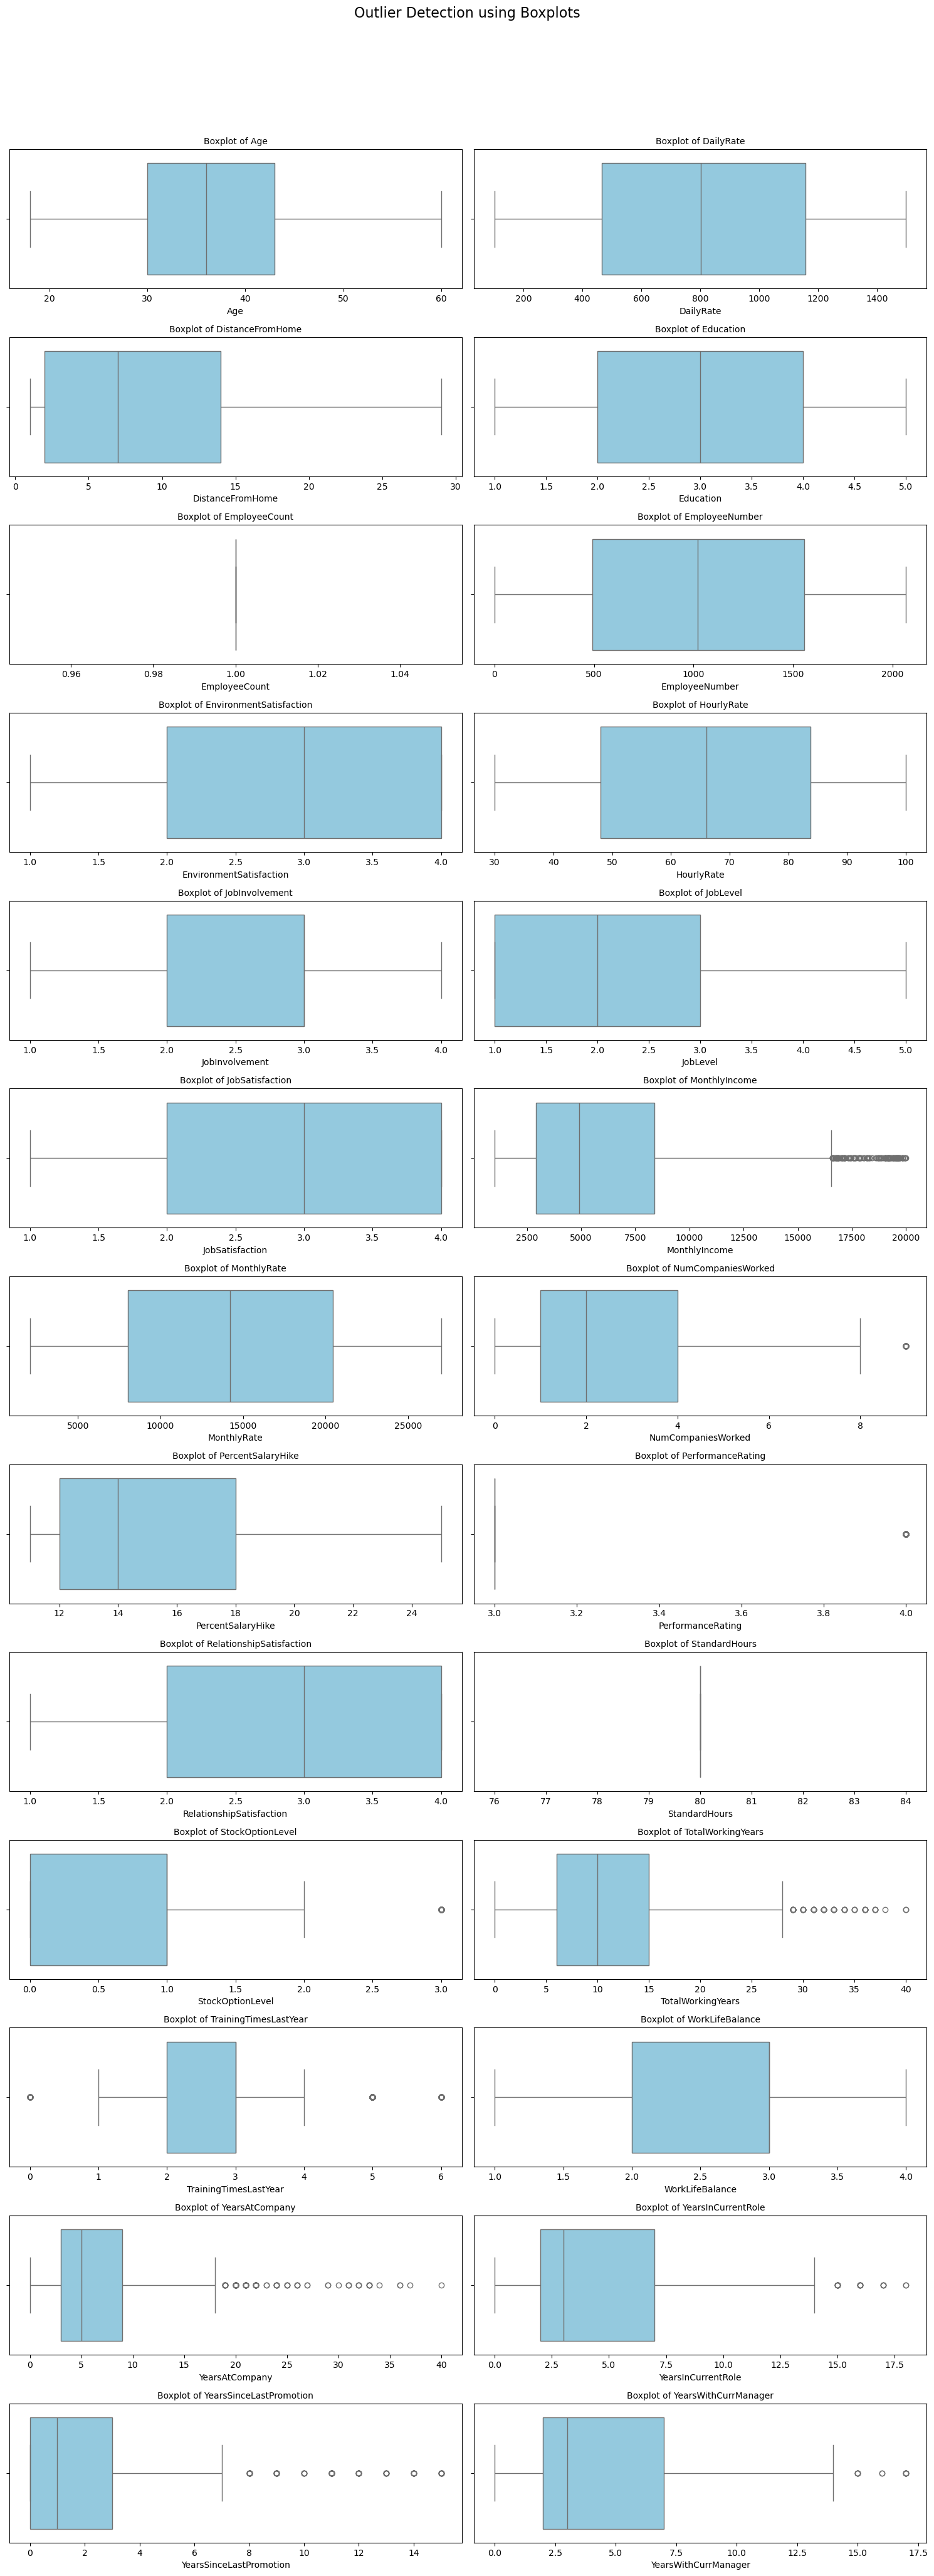

In [49]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Set up the plot grid
plt.figure(figsize=(15, len(numeric_cols) * 3))
# Loop through numeric columns to plot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}", fontsize=10)
    plt.tight_layout()
plt.suptitle("Outlier Detection using Boxplots", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

C:\Users\Vidyadheesha M Pandurangi\AppData\Local\Temp\ipykernel_18800\3433561368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Attrition", palette="Set2")


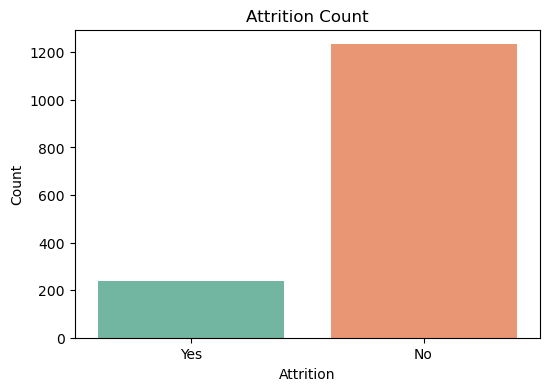

In [55]:
# Distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Attrition", palette="Set2")
plt.title("Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

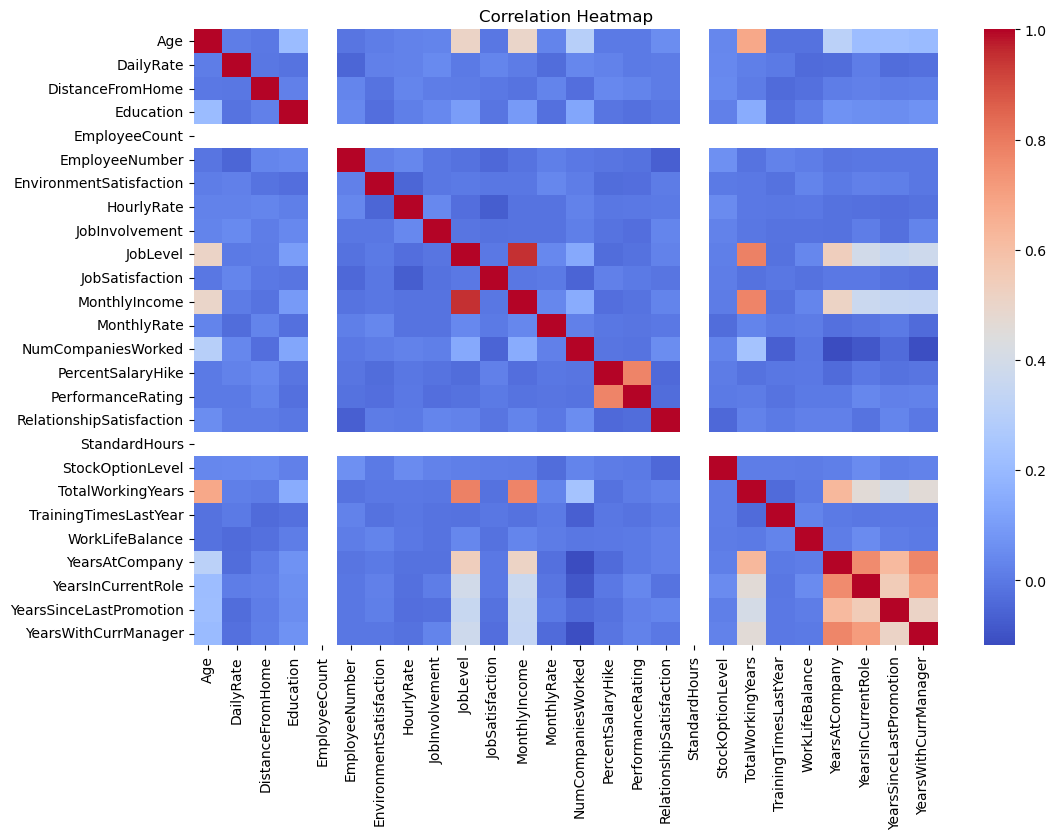

In [19]:
# Plot: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Vidyadheesha M Pandurangi\AppData\Local\Temp\ipykernel_7824\266434867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition", y="Age", palette="Set3")


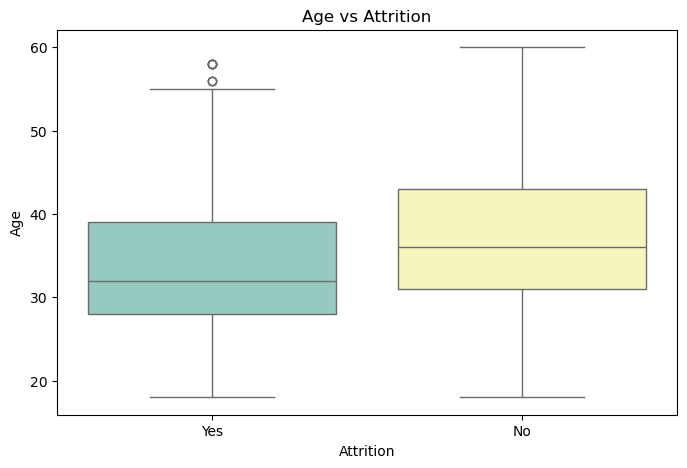

In [58]:
# Box plot of Age vs Attrition
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Attrition", y="Age", palette="Set3")
plt.title("Age vs Attrition")
plt.show()

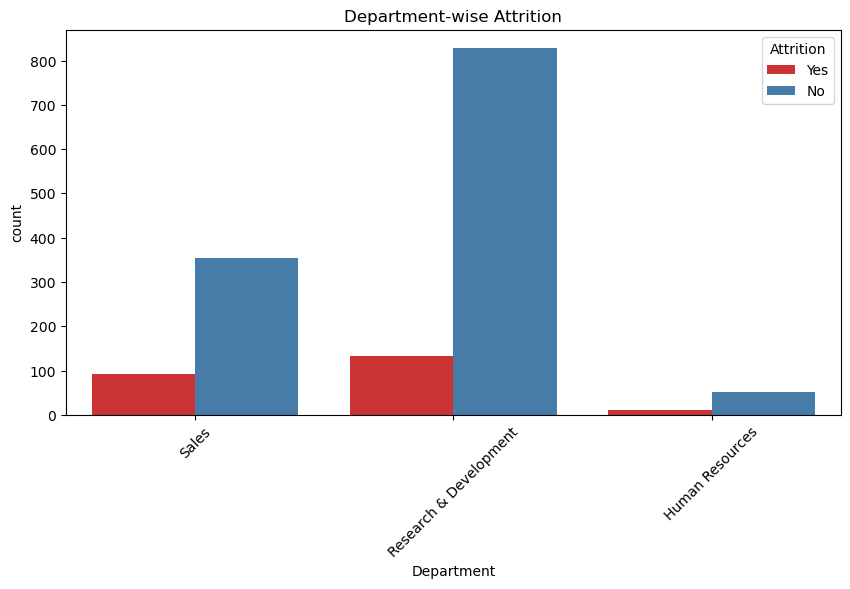

In [60]:
# Countplot for Department vs Attrition
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Department", hue="Attrition", palette="Set1")
plt.title("Department-wise Attrition")
plt.xticks(rotation=45)
plt.show()

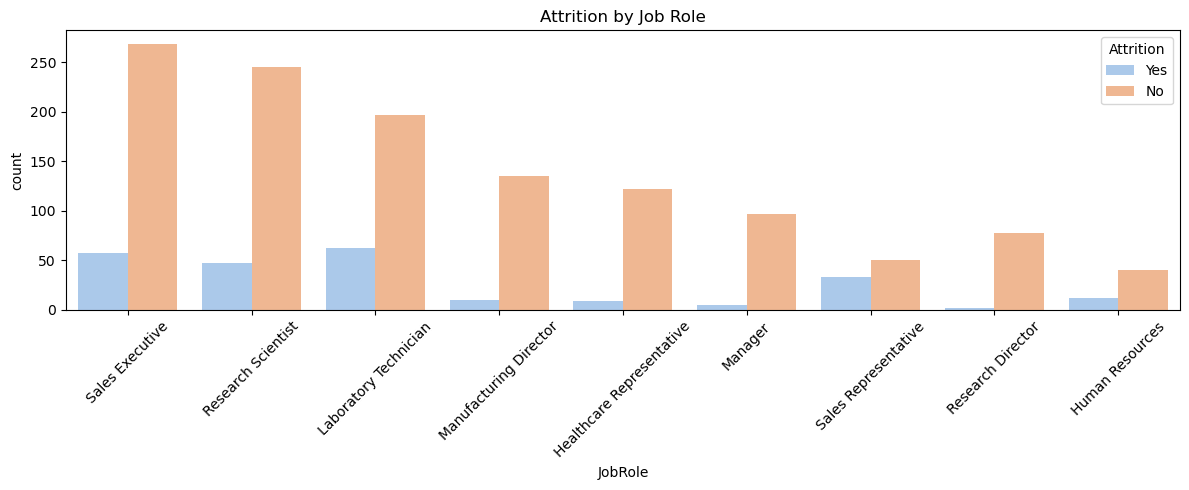

In [7]:
# Bar plot for JobRole vs Attrition
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="JobRole", hue="Attrition", palette="pastel")
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Vidyadheesha M Pandurangi\AppData\Local\Temp\ipykernel_18800\1934724423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition", y="MonthlyIncome", palette="cool")


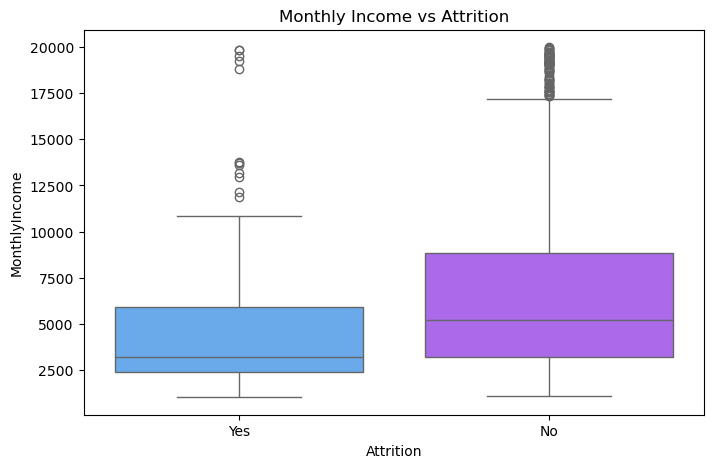

In [9]:
# Boxplot Attrition vs Monthly Income
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome", palette="cool")
plt.title("Monthly Income vs Attrition")
plt.show()

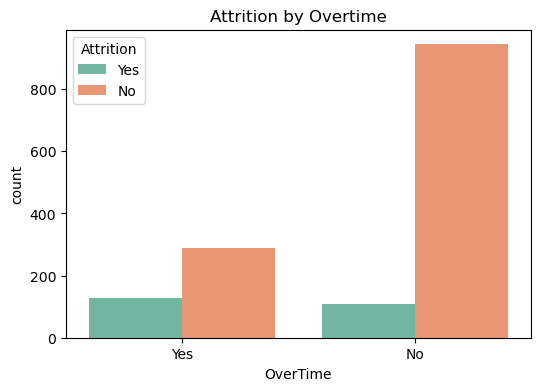

In [11]:
# Countplot for Attrition by Overtime
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="OverTime", hue="Attrition", palette="Set2")
plt.title("Attrition by Overtime")
plt.show()

In [31]:
# Separate features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identify numeric and categorical columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [35]:
# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into a column transformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

In [77]:
# Build a logistic regression pipeline
logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train model
logreg_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = logreg_pipeline.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

In [99]:
# Classification Report as Table
report_dict = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
table_data = []
for label, metrics in report_dict.items():
    if isinstance(metrics, dict):
        row = [label] + [f"{metrics[metric]:.2f}" for metric in ["precision", "recall", "f1-score", "support"]]
        table_data.append(row)

headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
report_table = tabulate(table_data, headers=headers, tablefmt="grid")

In [101]:
# Display
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Model Accuracy: 0.8945578231292517

Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.96      0.94       255
         Yes       0.64      0.46      0.54        39

    accuracy                           0.89       294
   macro avg       0.78      0.71      0.74       294
weighted avg       0.88      0.89      0.89       294



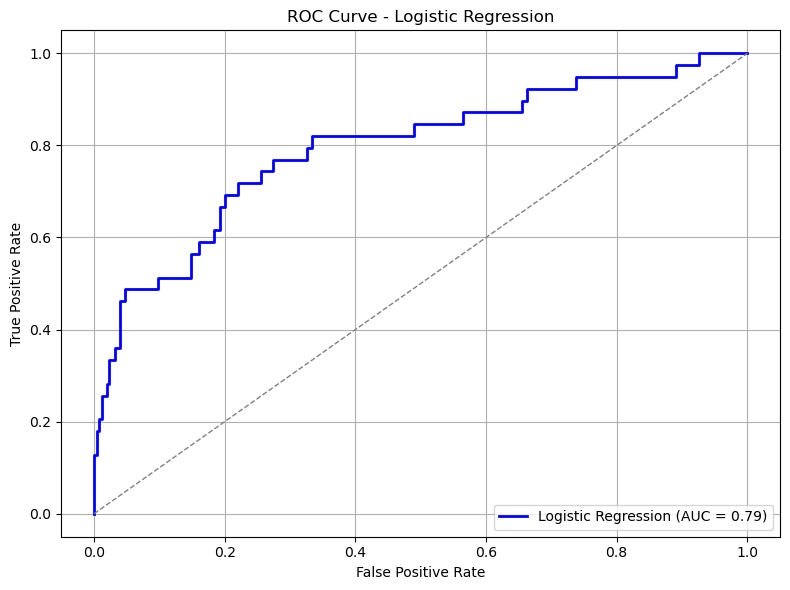

In [103]:
# Predict probabilities for the positive class
logreg_probs = logreg_pipeline.predict_proba(X_test)[:, 1]

# Compute False Positive Rate and True Positive Rate
fpr_lr, tpr_lr, _ = roc_curve(y_test, logreg_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line

# Plot settings
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()